In [1]:

#Importing all the libraries that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
# Read the data
df = pd.read_csv(r"C:\Users\somag\OneDrive\Desktop\mainflow intenship\disney_plus_titles.csv")

In [4]:
#Checking first five rows by calling df.head()
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,A Spark Story,"Jason Sterman, Leanne Dare","Apthon Corbin, Louis Gonzales",NaN,"September 24, 2021",2021,TV-PG,88 min,Documentary,Two Pixar filmmakers strive to bring their uni...
1,s2,Movie,Spooky Buddies,Robert Vince,"Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...","United States, Canada","September 24, 2021",2011,G,93 min,"Comedy, Fantasy, Kids",The puppies go on a spooky adventure through a...
2,s3,Movie,The Fault in Our Stars,Josh Boone,"Shailene Woodley, Ansel Elgort, Laura Dern, Sa...",United States,"September 24, 2021",2014,PG-13,127 min,"Coming of Age, Drama, Romance",Hazel and Gus share a love that sweeps them on...
3,s4,TV Show,Dog: Impossible,NaN,Matt Beisner,United States,"September 22, 2021",2019,TV-PG,2 Seasons,"Animals & Nature, Docuseries, Family",Matt Beisner uses unique approaches to modifyi...
4,s5,TV Show,Spidey And His Amazing Friends,NaN,"Benjamin Valic, Lily Sanfelippo, Jakari Fraser...",United States,"September 22, 2021",2021,TV-Y,1 Season,"Action-Adventure, Animation, Kids",Spidey teams up with pals to become The Spidey...


In [5]:

# Check initial data info and missing values
print("Initial Data Info:")
print(df.info())
print("\
Missing Values:")
print(df.isnull().sum())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1368 entries, 0 to 1367
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1368 non-null   object
 1   type          1368 non-null   object
 2   title         1368 non-null   object
 3   director      928 non-null    object
 4   cast          1194 non-null   object
 5   country       1193 non-null   object
 6   date_added    1365 non-null   object
 7   release_year  1368 non-null   int64 
 8   rating        1366 non-null   object
 9   duration      1368 non-null   object
 10  listed_in     1368 non-null   object
 11  description   1368 non-null   object
dtypes: int64(1), object(11)
memory usage: 128.4+ KB
None
Missing Values:
show_id           0
type              0
title             0
director        440
cast            174
country         175
date_added        3
release_year      0
rating            2
duration          0
listed_in   

In [6]:
# Clean the data
# Fill missing values appropriately
df['director'] = df['director'].fillna('Not Available')
df['cast'] = df['cast'].fillna('Not Available')
df['country'] = df['country'].fillna('Not Available')
df['date_added'] = pd.to_datetime(df['date_added'])


In [8]:
# Convert duration to numeric for movies
df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)
print("\
Cleaned Data Sample:")
print(df.head())


Cleaned Data Sample:
  show_id     type                           title  \
0      s1    Movie                   A Spark Story   
1      s2    Movie                  Spooky Buddies   
2      s3    Movie          The Fault in Our Stars   
3      s4  TV Show                 Dog: Impossible   
4      s5  TV Show  Spidey And His Amazing Friends   

                     director  \
0  Jason Sterman, Leanne Dare   
1                Robert Vince   
2                  Josh Boone   
3               Not Available   
4               Not Available   

                                                cast                country  \
0                      Apthon Corbin, Louis Gonzales          Not Available   
1  Tucker Albrizzi, Diedrich Bader, Ameko Eks Mas...  United States, Canada   
2  Shailene Woodley, Ansel Elgort, Laura Dern, Sa...          United States   
3                                       Matt Beisner          United States   
4  Benjamin Valic, Lily Sanfelippo, Jakari Fraser...        

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\somag\AppData\Local\Temp\ipykernel_4316\206790204.py:2: SyntaxWarning: invalid escape sequence '\d'
  df['duration_num'] = df['duration'].str.extract('(\d+)').astype(float)


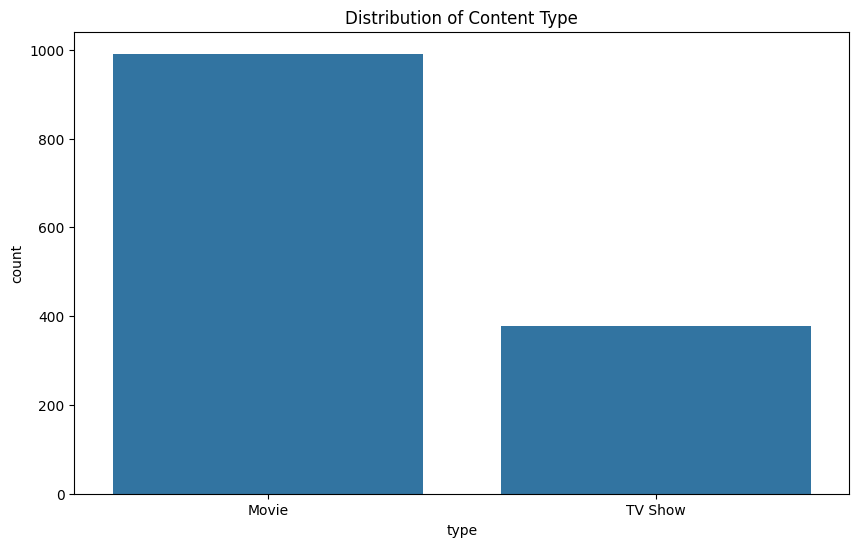

In [9]:
# 1. Content Type Distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type')
plt.title('Distribution of Content Type')
plt.show()

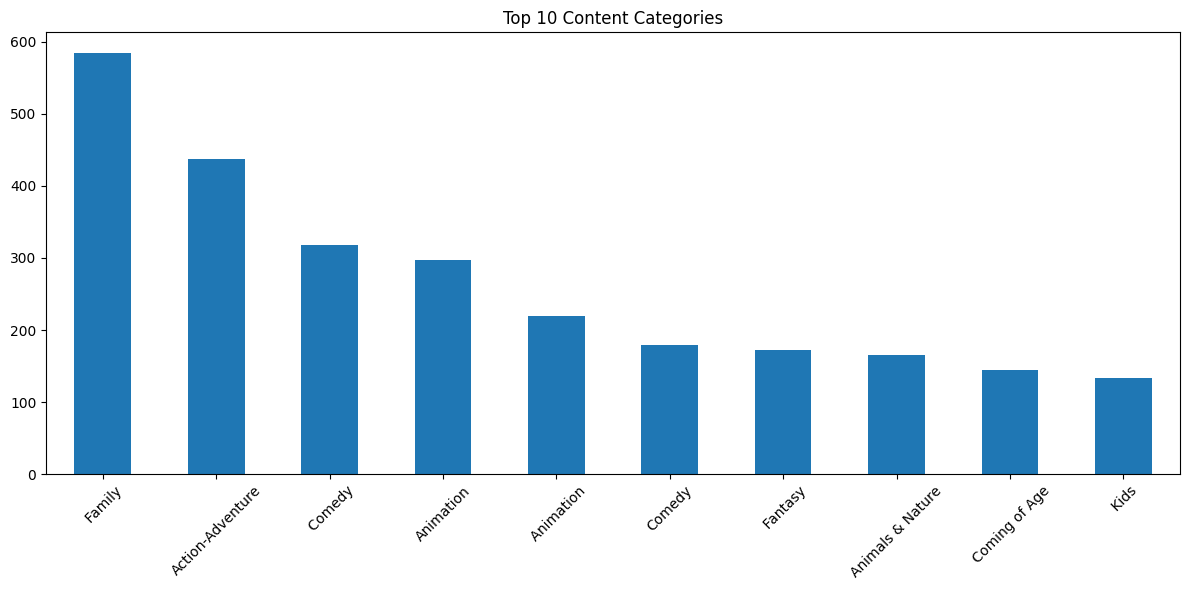

In [10]:
# 2. Top 10 Content Categories
categories = df['listed_in'].str.split(',', expand=True).stack().value_counts().head(10)
plt.figure(figsize=(12, 6))
categories.plot(kind='bar')
plt.title('Top 10 Content Categories')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

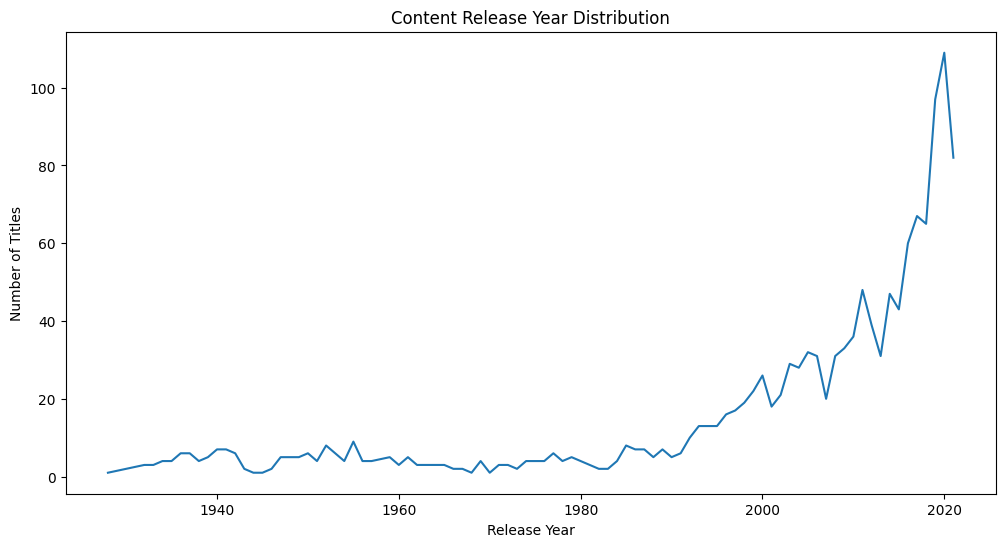

In [11]:

# 3. Content Release Year Distribution
plt.figure(figsize=(12, 6))
df['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Content Release Year Distribution')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

In [12]:
# Key Statistics
print("\
Key Insights:")
print("Total number of titles:", len(df))
print("Movies vs TV Shows ratio:", df['type'].value_counts().to_dict())
print("Average movie duration:", df[df['type'] == 'Movie']['duration_num'].mean(), "minutes")
print("Most common rating:", df['rating'].mode()[0])
print("Year range:", df['release_year'].min(), "to", df['release_year'].max())
print("Top 3 countries by content production:", df['country'].str.split(',').explode().value_counts().head(3).to_dict())

Key Insights:
Total number of titles: 1368
Movies vs TV Shows ratio: {'Movie': 991, 'TV Show': 377}
Average movie duration: 73.08072653884965 minutes
Most common rating: TV-G
Year range: 1928 to 2021
Top 3 countries by content production: {'United States': 1086, 'Not Available': 175, ' United States': 61}


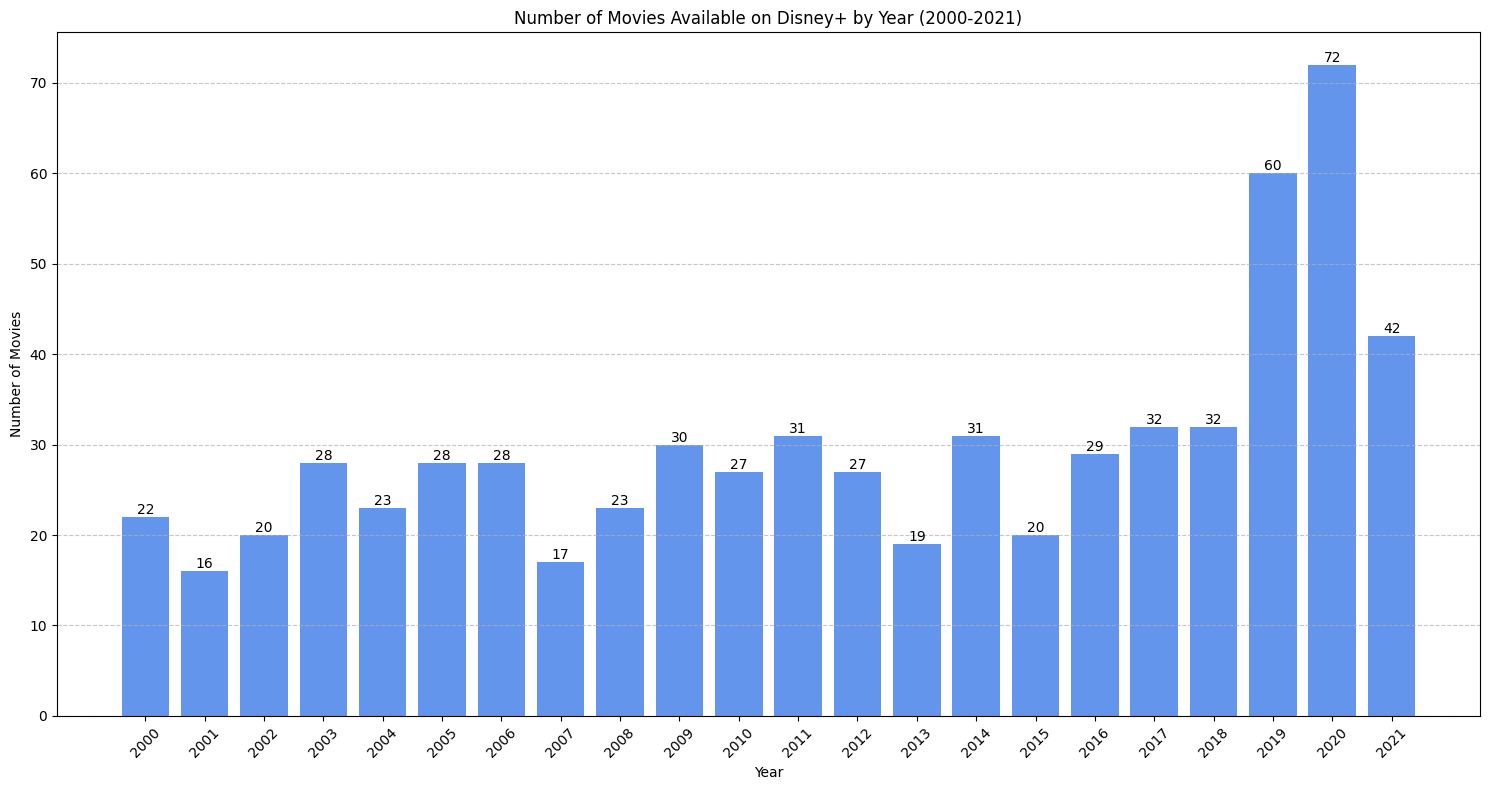

Summary of Movie Distribution:
Total number of movies (2000-2021): 657
Years with most movies:
 release_year  title
         2020     72
         2019     60
         2021     42
         2017     32
         2018     32


In [13]:
# Let's create a more detailed visualization of movie trends over the years
# We'll focus on more recent years (2000-2021) for better visibility

recent_movies = df[
    (df['type'] == 'Movie') & 
    (df['release_year'] >= 2000)
].groupby('release_year').agg({
    'title': 'count',
    'rating': lambda x: x.mode().iloc[0] if not x.empty else 'Unknown',
    'listed_in': lambda x: ', '.join(x.str.split(',').sum())
}).reset_index()

# Create a visualization
plt.figure(figsize=(15, 8))
bars = plt.bar(recent_movies['release_year'], recent_movies['title'], color='cornflowerblue')
plt.title('Number of Movies Available on Disney+ by Year (2000-2021)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(recent_movies['release_year'], rotation=45)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\
Summary of Movie Distribution:")
print(f"Total number of movies (2000-2021): {recent_movies['title'].sum()}")
print("\
Years with most movies:")
print(recent_movies.nlargest(5, 'title')[['release_year', 'title']].to_string(index=False))

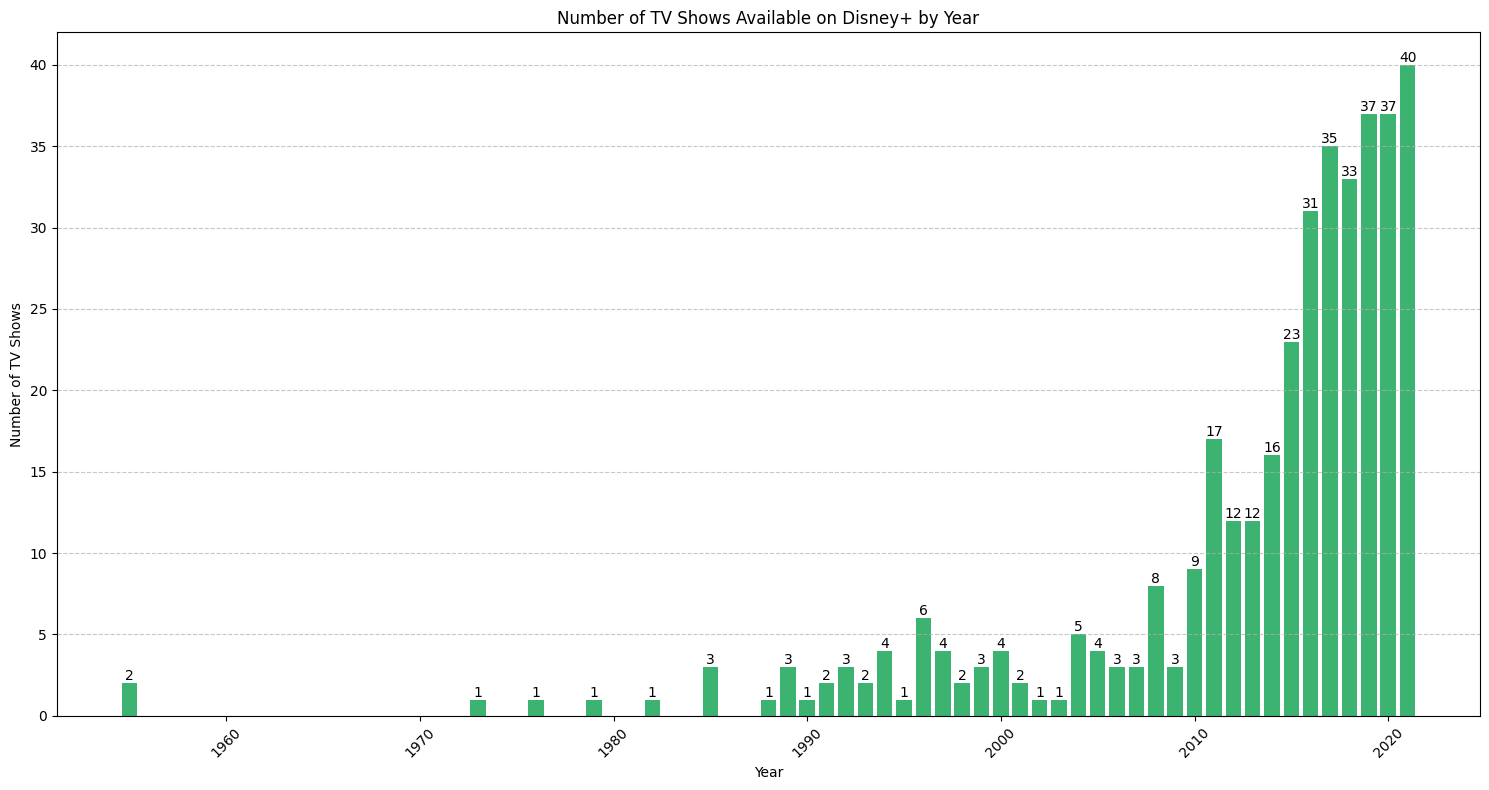

TV Shows Summary (2000-2021):
Total number of TV Shows (2000-2021): 336
Years with most TV Shows:
release_year
2021    40
2019    37
2020    37
2017    35
2018    33


In [14]:
# Analyze TV Shows trends
tv_shows = df[df['type'] == 'TV Show']

# Create visualization for TV Shows over years
plt.figure(figsize=(15, 8))
tv_by_year = tv_shows.groupby('release_year').size()
bars = plt.bar(tv_by_year.index, tv_by_year.values, color='mediumseagreen')
plt.title('Number of TV Shows Available on Disney+ by Year')
plt.xlabel('Year')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\
TV Shows Summary (2000-2021):")
recent_tv = tv_shows[tv_shows['release_year'] >= 2000]
print(f"Total number of TV Shows (2000-2021): {len(recent_tv)}")
print("\
Years with most TV Shows:")
top_years = tv_shows.groupby('release_year').size().sort_values(ascending=False).head()
print(top_years.to_string())

<Figure size 1500x800 with 0 Axes>

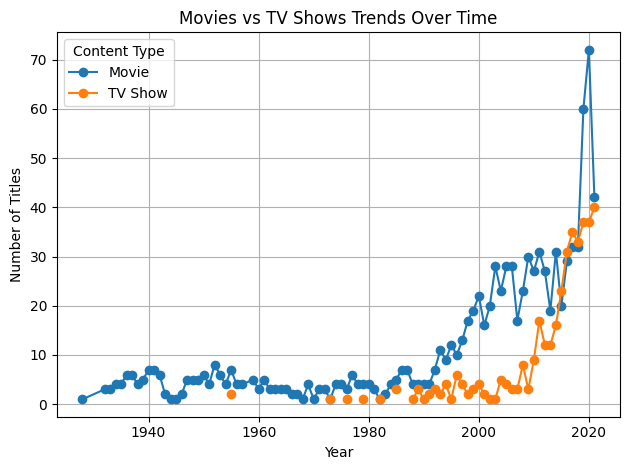

In [15]:
# Create comparison plot
plt.figure(figsize=(15, 8))
content_by_year = df.groupby(['release_year', 'type']).size().unstack()
content_by_year.plot(kind='line', marker='o')
plt.title('Movies vs TV Shows Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()

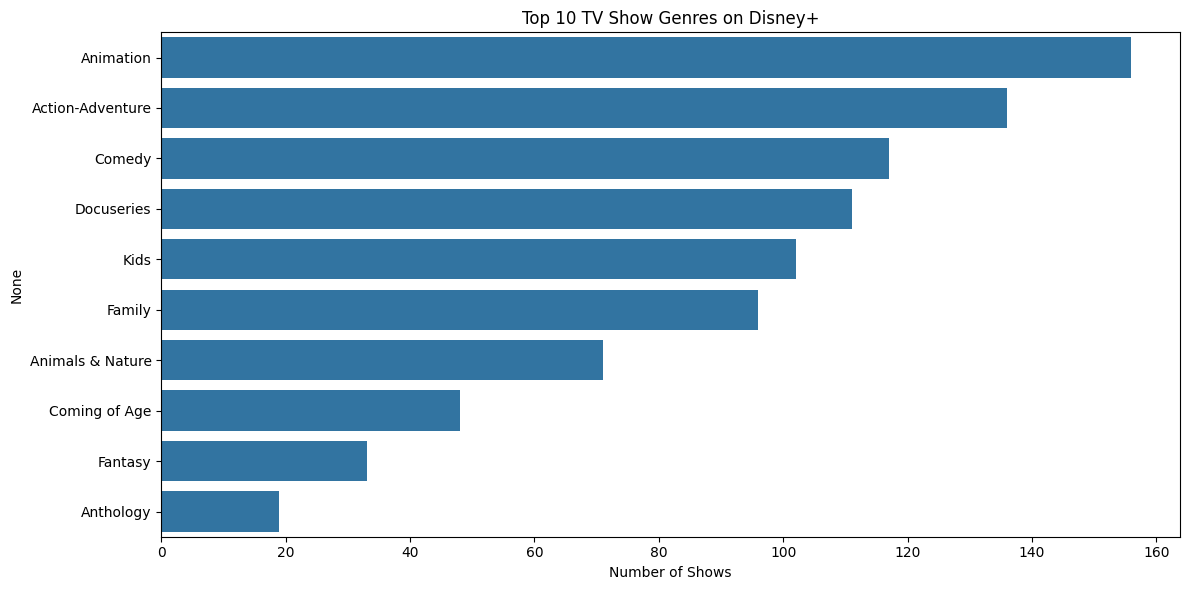

In [16]:
# Analyze genres
genres = df[df['type'] == 'TV Show']['listed_in'].str.split(',', expand=True).stack().str.strip()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title('Top 10 TV Show Genres on Disney+')
plt.xlabel('Number of Shows')
plt.tight_layout()
plt.show()

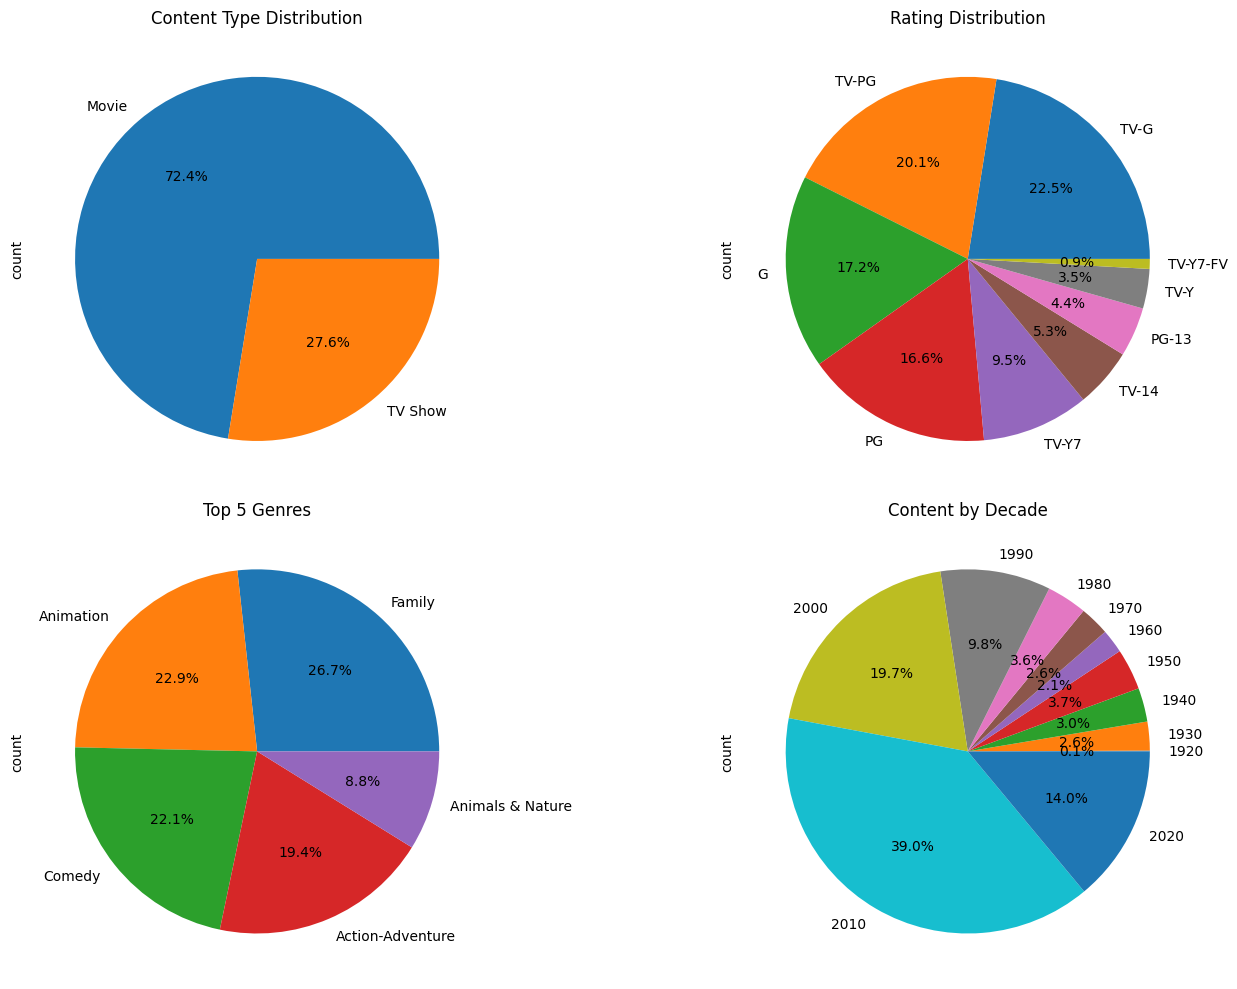

In [32]:
# Create pie charts for content distribution
plt.figure(figsize=(15, 10))

# Content Type Distribution
plt.subplot(2, 2, 1)
df['type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Content Type Distribution')

# Rating Distribution
plt.subplot(2, 2, 2)
df['rating'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Rating Distribution')

# Genre Distribution (top 5)
plt.subplot(2, 2, 3)
genres = df['listed_in'].str.split(',', expand=True).stack().str.strip()
genres.value_counts().head().plot(kind='pie', autopct='%1.1f%%')
plt.title('Top 5 Genres')

# Release Year Distribution (by decade)
plt.subplot(2, 2, 4)
df['decade'] = (df['release_year'] // 10) * 10
df['decade'].value_counts().sort_index().plot(kind='pie', autopct='%1.1f%%')
plt.title('Content by Decade')

plt.tight_layout()
plt.show()